# Importation des modules

In [21]:
# Pour manipuler et visualider des données
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pour énérer automatiquement un rapport détaillé de l'analyse des données
import sweetviz as sv

# Préparation des données

In [5]:
df = pd.read_csv("AnalysePat/dfClean.csv")
df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,totalPrice,review_score,customer_id,payment_type,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,5.0,3ce436f183e68e07877b285a838db11a,credit_card,28013,campos dos goytacazes,RJ,27277,volta redonda,SP,Gadget
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,4.0,f6dd3ec061db4e3987629fe6b26e5cce,credit_card,15775,santa fe do sul,SP,3471,sao paulo,SP,Animalerie
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,5.0,6489ae5e4333f3693df5ad4372dab6d3,credit_card,35661,para de minas,MG,37564,borda da mata,MG,Furniture
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,4.0,d4eb9395c8c0431ee92fce09860c5a06,credit_card,12952,atibaia,SP,14403,franca,SP,Parfum et soin
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,5.0,58dbd0b2d70206bf40e62cd34e84d795,credit_card,13226,varzea paulista,SP,87900,loanda,PR,Quincalerie


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99661 entries, 0 to 99660
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99661 non-null  object 
 1   order_item_id             99661 non-null  int64  
 2   product_id                99661 non-null  object 
 3   seller_id                 99661 non-null  object 
 4   shipping_limit_date       99661 non-null  object 
 5   price                     99661 non-null  float64
 6   freight_value             99661 non-null  float64
 7   totalPrice                99661 non-null  float64
 8   review_score              99661 non-null  float64
 9   customer_id               99661 non-null  object 
 10  payment_type              99661 non-null  object 
 11  customer_zip_code_prefix  99661 non-null  int64  
 12  customer_city             99661 non-null  object 
 13  customer_state            98841 non-null  object 
 14  seller

In [15]:
# Statistiques de base sur les colonnes numériques
df[["price", "freight_value", "totalPrice",	"review_score"]].describe()

,price,freight_value,totalPrice,review_score
count,99661.000000,99661.000000,99661.000000,99661.000000
mean,136.376785,22.688784,159.065569,4.104876
std,207.120377,20.886612,216.601375,1.331166
min,0.850000,0.000000,9.590000,1.000000
25%,45.900000,13.750000,61.750000,4.000000
50%,85.000000,17.100000,104.170000,5.000000
75%,149.900000,23.720000,176.160000,5.000000
max,13440.000000,1002.300000,13664.080000,5.000000


In [6]:
# Dictionnaire pour stocker les correspondances entre les abréviations et les noms complets des états
state_dict = {
    'SP': 'São Paulo',
    'MG': 'Minas Gerais',
    'PR': 'Paraná',
    'SC': 'Santa Catarina',
    'DF': 'Distrito Federal',
    'RS': 'Rio Grande do Sul',
    'RJ': 'Rio de Janeiro',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'ES': 'Espírito Santo',
    'BA': 'Bahia',
    'PI': 'Piauí',
    'RO': 'Rondônia',
    'MT': 'Mato Grosso',
    'CE': 'Ceará',
    'RN': 'Rio Grande do Norte',
    'PE': 'Pernambuco',
    'SE': 'Sergipe',
    'MS': 'Mato Grosso do Sul',
    'PB': 'Paraíba',
    'PA': 'Pará',
    'AM': 'Amazonas',
    'AC': 'Acre'
}

In [7]:
# On applique le dictionnaire aux colonnes voulues
df['seller_state'] = df['seller_state'].map(state_dict)
df['customer_state'] = df['customer_state'].map(state_dict)

In [8]:
df['seller_state'].head(5)

0       São Paulo
1       São Paulo
2    Minas Gerais
3       São Paulo
4          Paraná
Name: seller_state, dtype: object

In [10]:
df['customer_state'].head(5)

0    Rio de Janeiro
1         São Paulo
2      Minas Gerais
3         São Paulo
4         São Paulo
Name: customer_state, dtype: object

# Analyse univariée

In [12]:
# Utiliser sweetviz pour générer un rapport
report = sv.analyze(df)

# Afficher le rapport
report.show_html()

/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sweetviz/series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
/home/apprenant/Documents/Segmentation_Client/env/lib/python3.9/site-packages/sweetviz/series_analyzer_

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


On visualise nos données numériques :

In [19]:
df.select_dtypes(["int64","float64"])

,order_item_id,price,freight_value,totalPrice,review_score,customer_zip_code_prefix,seller_zip_code_prefix
0,1,58.90,13.29,72.19,5.0,28013,27277
1,1,239.90,19.93,259.83,4.0,15775,3471
2,1,199.00,17.87,216.87,5.0,35661,37564
3,1,12.99,12.79,25.78,4.0,12952,14403
4,1,199.90,18.14,218.04,5.0,13226,87900
...,...,...,...,...,...,...,...
99656,1,299.99,43.41,343.40,5.0,65077,88303
99657,1,350.00,36.53,386.53,5.0,81690,1206
99658,1,99.90,16.95,116.85,5.0,4039,80610
99659,1,55.99,8.72,64.71,5.0,13289,4733


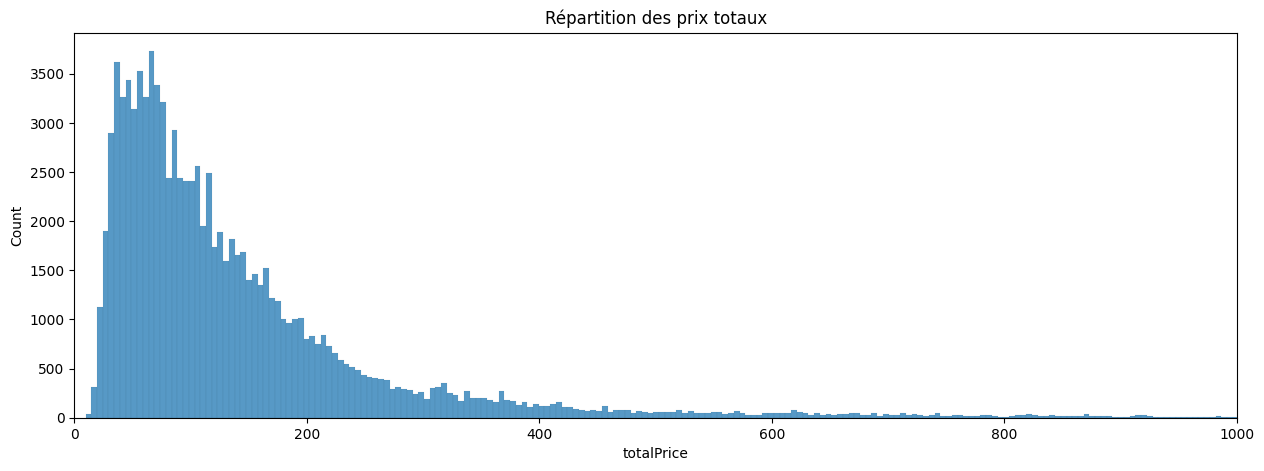

In [31]:
# Boxplot des prix totaux
plt.figure(figsize=(15,5))

plt.title("Répartition des prix totaux")
sns.histplot(x="totalPrice", data=df, )

plt.xlim(0, 1000)
plt.show()

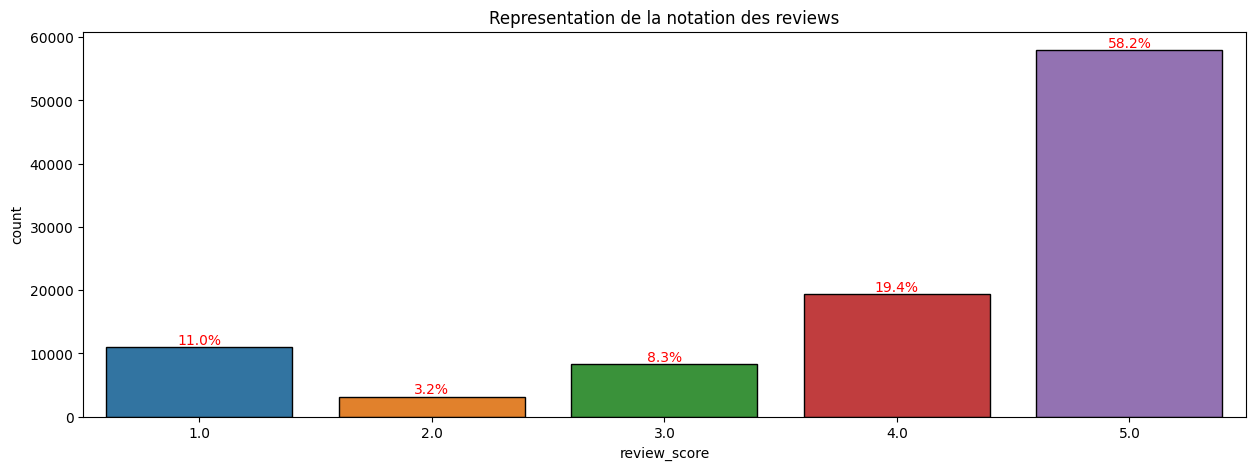

In [36]:
# Répartition des notes
plt.figure(figsize=(15,5))

plt.title("Representation de la notation des reviews")
plt.xlabel('reviews')
plt.ylabel('nombre')

ax = sns.countplot(x='review_score', data=df, edgecolor='k', linewidth=1)

for p in ax.patches:
    height = p.get_height()
    percentage = height / len(df['review_score']) * 100
    ax.text(p.get_x() + p.get_width()/2., height, '%.1f%%' % percentage, fontsize=10, color='red', ha='center', va='bottom')

plt.show()

# Analyse bivariée

### Ventes par catégorie

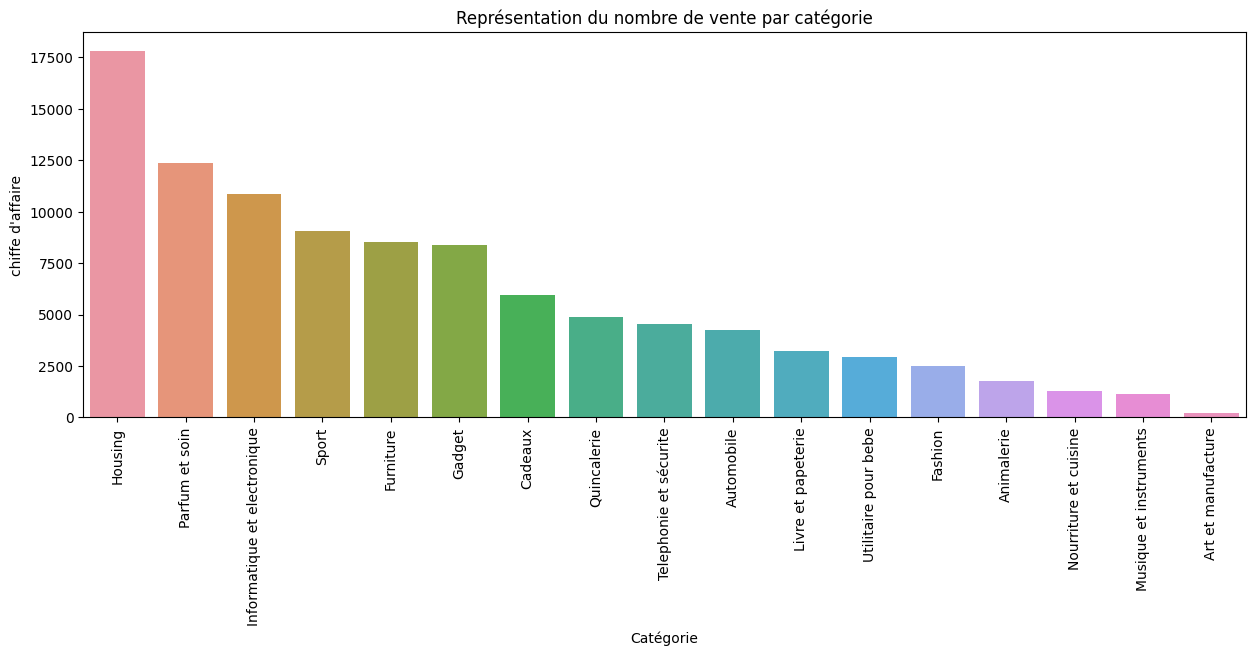

In [55]:
plt.figure(figsize=(15,5))

plt.title("Représentation du nombre de vente par catégorie")

sns.countplot(x='product_category_name', data=df, orient='v', order=df['product_category_name'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Catégorie')
plt.ylabel("chiffe d'affaire")

plt.show()

### Types de paiement par catégorie

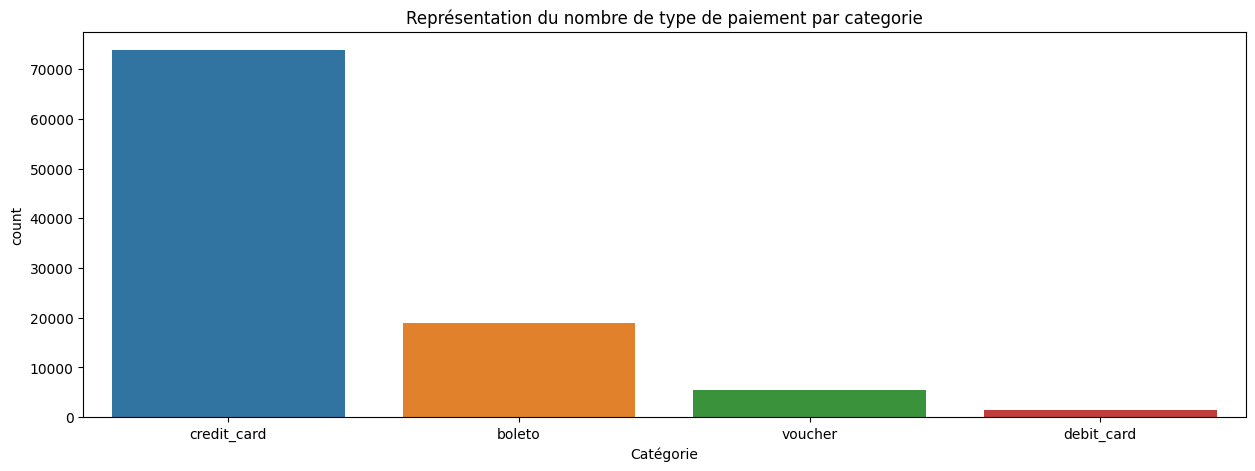

In [52]:
plt.figure(figsize=(15,5))

plt.title("Représentation du nombre de type de paiement par categorie")

sns.countplot(x='payment_type', data=df, orient='v', order=df['payment_type'].value_counts().index)
plt.xlabel('Catégorie')

plt.show()

### Ventes par ville

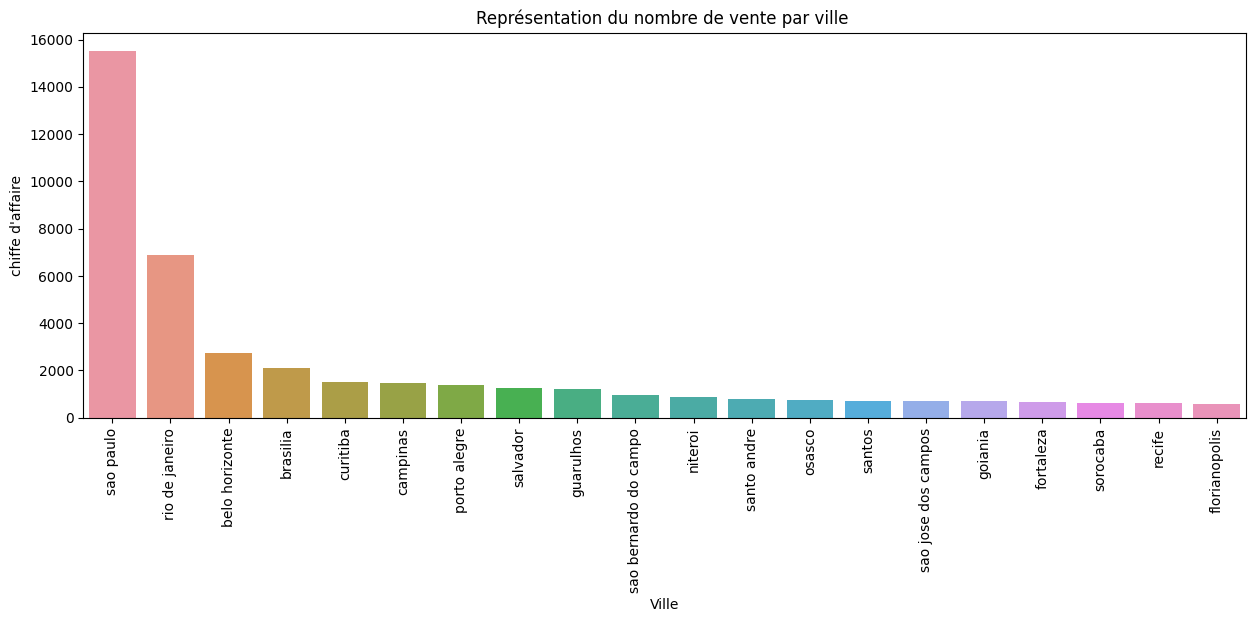

In [54]:
plt.figure(figsize=(15,5))

plt.title("Représentation du nombre de vente par ville ")

sns.countplot(x='customer_city', data=df, order=df['customer_city'].value_counts().index[:20])
plt.xticks(rotation = 90)
plt.xlabel('Ville')
plt.ylabel("chiffe d'affaire")

plt.show()

### Nombre de clients par ville